In [1]:
import scipy.sparse as sps
from Recommenders.Hybrid.ItemUserHybridKNNRecommender import ItemUserHybridKNNRecommender
from Utils.Evaluator import EvaluatorHoldout
import Utils.Reader as Reader
from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from Recommenders.MatrixFactorization.IALSRecommender import IALSRecommender


In [4]:
# deleting a column, reordering and then saving
import pandas as pd
import Utils.Reader as Reader

import scipy.sparse as sps
df = pd.read_csv(filepath_or_buffer='../data/rewatches.csv',
                         sep=",",
                         skiprows=1,
                         header=None,
                         dtype={0: int, 1: int,2: int},
                         engine='python')

Reader.df_col_normalize(df,2)
matrix_df=df.sort_values(by=[0,1])
matrix_df.to_csv('../output/out_2.csv', index=False)

KeyboardInterrupt: 

In [ ]:
# normalizing a column, reordering and then saving
import pandas as pd
import Utils.Reader as Reader

import scipy.sparse as sps
df = pd.read_csv(filepath_or_buffer='../data/rewatches.csv',
                 sep=",",
                 skiprows=1,
                 header=None,
                 dtype={0: int, 1: int,2: int},
                 engine='python')

df[2]= Reader.df_col_normalize(df,2)
df=df.sort_values(by=[0,1])
df.to_csv('../output/out_2.csv', index=False)

In [ ]:
# normalizing a column with substitution, reordering and then saving
import pandas as pd
import Utils.Reader as Reader

import scipy.sparse as sps
matrix_df = pd.read_csv(filepath_or_buffer='../output/extended.csv',
                        sep=",",
                        skiprows=1,
                        header=None,
                        dtype={0: int, 1: int, 2: int},
                        engine='python')
matrix_df.columns = ["a","b","data"]
Reader.df_col_normalize(matrix_df,"data",{-1:-0.5,0:0.5})
matrix_df.head()

In [ ]:
# 1 HOT ENCODER
import Utils.Reader as Reader
Reader.oneHotEncoder(name="Type", colsToDelete=["Data"],colstoOneHot=["Type"],dfPath='../data/data_ICM_length.csv')

In [ ]:
# DF SPLITTER
import Utils.Reader as Reader
Reader.df_splitter("Rewatch",[0,1],dtype={0: int, 1: int},name="rewatches_split_",dfPath='../data/rewatches.csv',colstoDefine=["UserID","ItemID","Rewatch"])

In [ ]:
# DF PREPROCESSING MODE
# 1-> Displayed (counts times a given Item has been displayed(in impressions list) to the user
# 2-> Extended (adds an interaction (-1) if a User has an item in impression list
# 3-> Count rewatches of each User-Item pair
# 4-> Count all rewatches of each user
import Utils.Reader as Reader
Reader.read_train_csr(matrix_path="../data/interactions_and_impressions.csv",preprocess=5,saving=True)

# Evaluator data

In [2]:
from Utils.Evaluator import EvaluatorHoldout
import Utils.Reader as Reader

from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample
#URM_all=Reader.load_URM(values_to_replace={0.01:0.02})
URM_all=Reader.read_train_csr(values_to_replace={0:0.03})
#URM_all=Reader.load_URM("../output/URM_2_mean.csv")
URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all ,train_percentage=0.80)
evaluator_test=EvaluatorHoldout(URM_test,cutoff_list=[10])



Unique UserID in the URM are 41629
Unique UserID in the URM and ICM are 41629
5826506
EvaluatorHoldout: Ignoring 302 ( 0.7%) Users that have less than 1 test interactions


In [3]:
import numpy as np
import scipy.sparse as sps
group_id=25
profile_length = np.ediff1d(sps.csr_matrix(URM_train).indptr)
sorted_users = np.argsort(profile_length)
block_size = int(len(profile_length)*0.05)
start_pos = group_id*block_size
end_pos = min((group_id+1)*block_size, len(profile_length))
for group_id in range(0, 20):
    start_pos = group_id * block_size
    end_pos = min((group_id+1) * block_size, len(profile_length))

    users_in_group = sorted_users[start_pos:end_pos]

    users_in_group_p_len = profile_length[users_in_group]

    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id,
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))

users_in_group = sorted_users[start_pos:end_pos]

users_in_group_p_len = profile_length[users_in_group]

Group 0, #users in group 2081, average p.len 9.74, median 10.0, min 2, max 12
Group 1, #users in group 2081, average p.len 12.51, median 13.0, min 12, max 13
Group 2, #users in group 2081, average p.len 14.02, median 14.0, min 13, max 15
Group 3, #users in group 2081, average p.len 15.33, median 15.0, min 15, max 16
Group 4, #users in group 2081, average p.len 16.42, median 16.0, min 16, max 17
Group 5, #users in group 2081, average p.len 17.49, median 17.0, min 17, max 18
Group 6, #users in group 2081, average p.len 18.60, median 19.0, min 18, max 19
Group 7, #users in group 2081, average p.len 19.73, median 20.0, min 19, max 20
Group 8, #users in group 2081, average p.len 20.99, median 21.0, min 20, max 22
Group 9, #users in group 2081, average p.len 22.34, median 22.0, min 22, max 23
Group 10, #users in group 2081, average p.len 23.63, median 24.0, min 23, max 24
Group 11, #users in group 2081, average p.len 25.42, median 25.0, min 24, max 26
Group 12, #users in group 2081, average 

In [ ]:
from Recommenders.NonPersonalizedRecommender import TopPop
from Recommenders.KNN.UserKNNCFRecommender import UserKNNCFRecommender
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender
from Recommenders.GraphBased.P3alphaRecommender import P3alphaRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender
from Recommenders.MatrixFactorization.Cython.MatrixFactorization_Cython import MatrixFactorization_BPR_Cython, MatrixFactorization_FunkSVD_Cython, MatrixFactorization_AsySVD_Cython
from Recommenders.MatrixFactorization.PureSVDRecommender import PureSVDRecommender
from Recommenders.MatrixFactorization.IALSRecommender import IALSRecommender
from Recommenders.MatrixFactorization.NMFRecommender import NMFRecommender

MAP_recommender_per_group = {}

collaborative_recommender_class = {
                                   "ItemKNNCF": ItemKNNCFRecommender,
                                   "P3alpha": P3alphaRecommender,
                                   "RP3beta": RP3betaRecommender,
                                   "IALS": IALSRecommender,
                                   "SLIMBPR": SLIM_BPR_Cython,
                                   }


recommender_object_dict = {}

for label, recommender_class in collaborative_recommender_class.items():
    recommender_object = recommender_class(URM_train)
    recommender_object.fit()
    recommender_object_dict[label] = recommender_object



In [ ]:
cutoff = 10
from tqdm.notebook import tqdm

for group_id in tqdm(range(0, 20)):

    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))

    users_in_group = sorted_users[start_pos:end_pos]

    users_in_group_p_len = profile_length[users_in_group]
    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]

    evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[cutoff], ignore_users=users_not_in_group)

    for label, recommender in recommender_object_dict.items():
        result_df, _ = evaluator_test.evaluateRecommender(recommender)
        if label in MAP_recommender_per_group:
            MAP_recommender_per_group[label].append(result_df.loc[cutoff]["MAP"])
        else:
            MAP_recommender_per_group[label] = [result_df.loc[cutoff]["MAP"]]

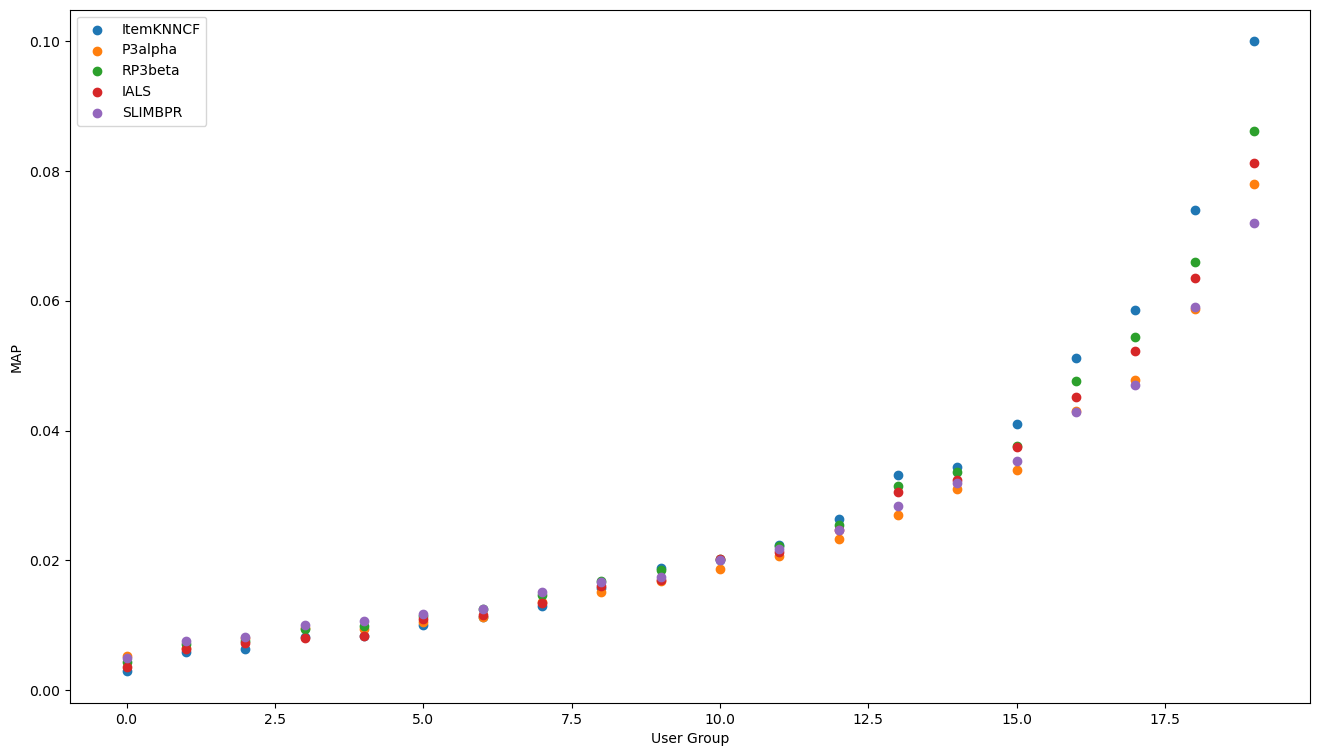

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.figure(figsize=(16, 9))
for label, recommender in recommender_object_dict.items():
    results = MAP_recommender_per_group[label]
    plt.scatter(x=np.arange(0,len(results)), y=results, label=label)
plt.ylabel('MAP')
plt.xlabel('User Group')
plt.legend()
plt.show()

# Recommenders

In [14]:
users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
users_not_in_group = sorted_users[users_not_in_group_flag]
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10], ignore_users=users_not_in_group)


EvaluatorHoldout: Ignoring 335 ( 0.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 41629 Users


In [7]:
from Recommenders.GeneralizedMergedHybridRecommender import GeneralizedMergedHybridRecommender
alpha=0.30
beta=0.30
group_id=20
profile_length = np.ediff1d(sps.csr_matrix(URM_train).indptr)
sorted_users = np.argsort(profile_length)
block_size = int(len(profile_length)*0.05)
start_pos = group_id*block_size
end_pos = min((group_id+1)*block_size, len(profile_length))
start_pos = group_id*block_size
end_pos = min((group_id+1)*block_size, len(profile_length))

users_in_group = sorted_users[start_pos:end_pos]

users_in_group_p_len = profile_length[users_in_group]
users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
users_not_in_group = sorted_users[users_not_in_group_flag]

evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[cutoff], ignore_users=users_not_in_group)

rp3=RP3betaRecommender(URM_train)
rp3.fit()

ials=IALSRecommender(URM_train)
ials.fit()

itemKNN=ItemKNNCFRecommender(URM_train)
itemKNN.fit()

higher_recommender = GeneralizedMergedHybridRecommender(
    URM_train=URM_train,
    recommenders=[
        rp3,
        ials,
        itemKNN

    ],
    verbose=False
)
higher_recommender.fit(
    alphas=[
        alpha,beta,
        1 - alpha - beta
    ]
)

slim =SLIM_BPR_Cython(URM_train)
slim.fit()

p3=P3alphaRecommender(URM_train)
p3.fit()

lower_recommender = GeneralizedMergedHybridRecommender(
    URM_train=URM_train,
    recommenders=[
        p3,
        slim

    ],
    verbose=False
)
lower_recommender.fit(
    alphas=[
        0.5,
        0.5
    ]
)

EvaluatorHoldout: Ignoring 302 ( 0.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 41620 Users
RP3betaRecommender: Similarity column 24507 (100.0%), 1135.14 column/sec. Elapsed time 21.59 sec
IALSRecommender: Epoch 1 of 115. Elapsed time 25.32 sec
IALSRecommender: Epoch 2 of 115. Elapsed time 42.59 sec
IALSRecommender: Epoch 3 of 115. Elapsed time 59.95 sec
IALSRecommender: Epoch 4 of 115. Elapsed time 1.30 min
IALSRecommender: Epoch 5 of 115. Elapsed time 1.60 min
IALSRecommender: Epoch 6 of 115. Elapsed time 2.02 min
IALSRecommender: Epoch 7 of 115. Elapsed time 2.37 min
IALSRecommender: Epoch 8 of 115. Elapsed time 2.73 min
IALSRecommender: Epoch 9 of 115. Elapsed time 2.99 min
IALSRecommender: Epoch 10 of 115. Elapsed time 3.25 min
IALSRecommender: Epoch 11 of 115. Elapsed time 3.52 min
IALSRecommender: Epoch 12 of 115. Elapsed time 3.78 min
IALSRecommender: Epoch 13 of 115. Elapsed time 4.04 min
IALSRecommender: Epoch 14 of 115. Elapsed time 4.33 min
I

In [8]:
result_df, _ = evaluator_test.evaluateRecommender(higher_recommender)
result_df

EvaluatorHoldout: Processed 9 (100.0%) in 1.41 sec. Users per second: 6


PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
cutoff                                                                      
10      0.255556                 0.255556  0.018153  0.103915    0.103915   

             MRR      NDCG        F1 HIT_RATE ARHR_ALL_HITS  ...  \
cutoff                                                       ...   
10      0.459392  0.060971  0.033898      1.0      0.685714  ...   

       COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
cutoff                                                              
10               1.0               1.0         1.0       0.002423   

       SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
cutoff                                                                   
10            6.022246                   0.983039             0.004772   

       RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
cutoff                                                               
10                  0.446296                  3.02403      0.282925  

[1 rows x 27 columns]

In [ ]:
profile_length = np.ediff1d(URM_all.indptr)
block_size = int(len(profile_length) * 0.25)

start_lower = 0
end_lower = 3 * block_size
end_higher = len(profile_length)
sorted_users = np.argsort(profile_length)

users_in_lower = set(sorted_users[0:end_lower])

users_in_higher = set(sorted_users[end_lower:end_higher])


In [15]:
#1
# BEST MODEL UNTIL NOW _ PROVA
from Recommenders.Hybrid.ItemUserHybridKNNRecommender import ItemUserHybridKNNRecommender

recommender_ItemUserHybridKNNRecommender = ItemUserHybridKNNRecommender(URM_train)
recommender_ItemUserHybridKNNRecommender.fit(

)

result_df, _ = evaluator_test.evaluateRecommender(recommender_ItemUserHybridKNNRecommender)
result_df

Similarity column 24507 (100.0%), 2836.34 column/sec. Elapsed time 8.64 sec
Similarity column 41629 (100.0%), 1217.48 column/sec. Elapsed time 34.19 sec
EvaluatorHoldout: WARNING: No users had a sufficient number of relevant items


TypeError: unsupported format string passed to MAP.__format__

In [27]:
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender

recommender_ItemKNNCF = ItemKNNCFRecommender(URM_train)
recommender_ItemKNNCF.fit(

)

result_df, _ = evaluator_test.evaluateRecommender(recommender_ItemKNNCF)
result_df["MAP"]

Similarity column 24507 (100.0%), 3434.73 column/sec. Elapsed time 7.14 sec


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.02 min. Users per second: 672


cutoff
10    0.02845
Name: MAP, dtype: object

In [ ]:
from Recommenders.MatrixFactorization.IALSRecommender import IALSRecommender

ials=IALSRecommender(URM_train)
ials.fit( num_factors= 77, epochs= 115, confidence_scaling= 'linear', alpha=  3.951833188581218, epsilon= 1.1320191944038327, reg= 4.746687709282205e-05)

result_df, _ = evaluator_test.evaluateRecommender(ials)
result_df

IALSRecommender: Epoch 1 of 115. Elapsed time 17.67 sec
IALSRecommender: Epoch 2 of 115. Elapsed time 36.09 sec
IALSRecommender: Epoch 3 of 115. Elapsed time 51.89 sec
IALSRecommender: Epoch 4 of 115. Elapsed time 1.12 min
IALSRecommender: Epoch 5 of 115. Elapsed time 1.38 min
IALSRecommender: Epoch 6 of 115. Elapsed time 1.67 min
IALSRecommender: Epoch 7 of 115. Elapsed time 2.06 min
IALSRecommender: Epoch 8 of 115. Elapsed time 2.32 min
IALSRecommender: Epoch 9 of 115. Elapsed time 2.58 min
IALSRecommender: Epoch 10 of 115. Elapsed time 2.83 min
IALSRecommender: Epoch 11 of 115. Elapsed time 3.09 min
IALSRecommender: Epoch 12 of 115. Elapsed time 3.34 min
IALSRecommender: Epoch 13 of 115. Elapsed time 3.59 min
IALSRecommender: Epoch 14 of 115. Elapsed time 3.84 min
IALSRecommender: Epoch 15 of 115. Elapsed time 4.09 min
IALSRecommender: Epoch 16 of 115. Elapsed time 4.36 min
IALSRecommender: Epoch 17 of 115. Elapsed time 4.61 min
IALSRecommender: Epoch 18 of 115. Elapsed time 4.86 mi

In [8]:
alpha = 0.3
new_similarity = (1 - alpha) * ials.W_sparse + alpha * recommender_ItemKNNCF.W_sparse # Weighted Sum
from Recommenders.KNN.ItemKNNCustomSimilarityRecommender import ItemKNNCustomSimilarityRecommender

recommender_object = ItemKNNCustomSimilarityRecommender(URM_train)
recommender_object.fit(new_similarity)

result_df, _ = evaluator_validation.evaluateRecommender(recommender_object)
result_df

AttributeError: 'IALSRecommender' object has no attribute 'W_sparse'

In [7]:
from Recommenders.BaseRecommender import BaseRecommender

class ScoresHybridRecommender(BaseRecommender):
    """ ScoresHybridRecommender
    Hybrid of two prediction scores R = R1*alpha + R2*(1-alpha)

    """

    RECOMMENDER_NAME = "ScoresHybridRecommender"

    def __init__(self, URM_train, recommender_1, recommender_2):
        super(ScoresHybridRecommender, self).__init__(URM_train)

        self.URM_train = sps.csr_matrix(URM_train)
        self.recommender_1 = recommender_1
        self.recommender_2 = recommender_2


    def fit(self, alpha = 0.5):
        self.alpha = alpha


    def _compute_item_score(self, user_id_array, items_to_compute):

        # In a simple extension this could be a loop over a list of pretrained recommender objects
        item_weights_1 = self.recommender_1._compute_item_score(user_id_array)
        item_weights_2 = self.recommender_2._compute_item_score(user_id_array)

        item_weights = item_weights_1*self.alpha + item_weights_2*(1-self.alpha)

        return item_weights

In [65]:
recommender_ItemKNNCF = ItemKNNCFRecommender(URM_train)
recommender_ItemKNNCF.fit(
)

Similarity column 24507 (100.0%), 1703.78 column/sec. Elapsed time 14.38 sec


In [ ]:
from Recommenders.GraphBased.P3alphaRecommender import P3alphaRecommender
from Recommenders.MatrixFactorization.PureSVDRecommender import PureSVDRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender
#ALL TRIES
import numpy
import itertools
from tqdm.notebook import tqdm
# GRID SEARCH RP3BETA

URM_all=Reader.read_train_csr(values_to_replace={0:0.03})
#URM_all=Reader.load_URM("../output/URM_2_mean.csv")
URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all ,train_percentage=0.80)
evaluator_test=EvaluatorHoldout(URM_test,cutoff_list=[10])
ials=IALSRecommender(URM_train)
ials.fit( num_factors= 77, epochs= 115, confidence_scaling= 'linear', alpha=  3.951833188581218, epsilon= 1.1320191944038327, reg= 4.746687709282205e-05)
#recommender_ItemKNNCF = ItemKNNCFRecommender(URM_train)
#recommender_ItemKNNCF.fit()
rp3=RP3betaRecommender(URM_train)
rp3.fit(
    topK= 339, alpha= 0.0, beta= 0.3326953675715214, normalize_similarity= True
)
pureSVD=PureSVDRecommender(URM_train)
pureSVD.fit(
    num_factors= 30
)

P3alpha=P3alphaRecommender(URM_train)
P3alpha.fit(
    topK= 564, alpha= 0.18769516845528106, normalize_similarity= True
)

algoList=[recommender_ItemKNNCF,pureSVD,P3alpha,rp3]

best=0
alpha=0
algo=""
dList=numpy.arange(0.25, 1, 0.25)
for x in tqdm(itertools.product(dList,algoList),total=int(len(dList)*len(algoList)), position=0, leave=True):

    scoreshybridrecommender = ScoresHybridRecommender(URM_train, ials, x[1])
    scoreshybridrecommender.fit(alpha = x[0])
    result_df, _ = evaluator_test.evaluateRecommender(scoreshybridrecommender)


    if result_df["MAP"][10] > best:
        best=result_df["MAP"][10]
        alpha=x[0]
        algo=x[1]




In [34]:
#1
import numpy
import itertools
from tqdm.notebook import tqdm
# GRID SEARCH RP3BETA
best=0
a=0
dList=numpy.arange(0.07, 0.09, 0.001)
for x in tqdm(itertools(dList,),total=int(len(dList)), position=0, leave=True):

    scoreshybridrecommender = ScoresHybridRecommender(URM_train, recommender_ItemKNNCF, ials)
    scoreshybridrecommender.fit(alpha = x)
    result_df, _ = evaluator_test.evaluateRecommender(scoreshybridrecommender)


    if result_df["MAP"][10] > best:
        best=result_df["MAP"][10]
        a=x


  0%|          | 0/20 [00:00<?, ?it/s]

/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.26 min. Users per second: 547


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.20 min. Users per second: 572


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.20 min. Users per second: 576


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.19 min. Users per second: 579


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.19 min. Users per second: 578


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.32 min. Users per second: 523


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.66 min. Users per second: 415


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.29 min. Users per second: 533


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.13 min. Users per second: 610


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.14 min. Users per second: 605


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.37 min. Users per second: 501


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.20 min. Users per second: 571


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.15 min. Users per second: 597


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.15 min. Users per second: 598


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.15 min. Users per second: 599


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.18 min. Users per second: 584


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.15 min. Users per second: 597


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.15 min. Users per second: 597


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.16 min. Users per second: 595


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.15 min. Users per second: 600


In [36]:
best

0.031083362353399153

In [37]:

scoreshybridrecommender = ScoresHybridRecommender(URM_train, recommender_ItemKNNCF, ials)
scoreshybridrecommender.fit(alpha = a)
result_df, _ = evaluator_test.evaluateRecommender(scoreshybridrecommender)
result_df

/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41296 (100.0%) in 1.27 min. Users per second: 543


PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
cutoff                                                                      
10      0.061178                 0.082846  0.071695  0.031083    0.041223   

             MRR NDCG       F1  HIT_RATE ARHR_ALL_HITS  ... COVERAGE_USER  \
cutoff                                                  ...                 
10      0.192995  NaN  0.06602  0.377107      0.242598  ...      0.992001   

       COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI SHANNON_ENTROPY  \
cutoff                                                                
10               0.37409    0.992001       0.023898        9.196561   

       RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI RATIO_SHANNON_ENTROPY  \
cutoff                                                                         
10                       0.996042             0.047047              0.681482   

       RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
cutoff                                         
10                     3.326492      0.267823  

[1 rows x 27 columns]

In [38]:
a

0.07800000000000001

In [ ]:
#1
# BEST MODEL UNTIL NOW _ PROVA
from Recommenders.Hybrid.ItemUserHybridKNNRecommender import ItemUserHybridKNNRecommender

recommender_ItemUserHybridKNNRecommender = ItemUserHybridKNNRecommender(URM_train)
recommender_ItemUserHybridKNNRecommender.fit(
    topK_CF= 1018, shrink_CF= 1549, similarity_CF= 'cosine', topK= 1772,shrink= 177, similarity='cosine', alpha= 0.5, normalize_CF=True, normalize= True, norm_scores= True
)

result_df, _ = evaluator_test.evaluateRecommender(recommender_ItemUserHybridKNNRecommender)
result_df

In [ ]:
#1
import numpy
import itertools
from tqdm.notebook import tqdm
# GRID SEARCH RP3BETA
best=0
a=0
dList=numpy.arange(0.0, 0.9, 0.05)
for x in tqdm(dList,total=int(len(dList)), position=0, leave=True):

    scoreshybridrecommender = ScoresHybridRecommender(URM_train, recommender_ItemUserHybridKNNRecommender, ials)
    scoreshybridrecommender.fit(alpha = x)
    result_df, _ = evaluator_test.evaluateRecommender(scoreshybridrecommender)


    if result_df["MAP"][10] > best:
        best=result_df["MAP"][10]
        a=x


In [20]:

scoreshybridrecommender = ScoresHybridRecommender(URM_train, recommender_ItemUserHybridKNNRecommender, ials)
scoreshybridrecommender.fit(alpha = a)
result_df, _ = evaluator_test.evaluateRecommender(scoreshybridrecommender)
result_df

[[-0.17133638 -0.16049199 -0.12265938 ... -0.35484043 -0.13277732
  -0.32309386]
 [-0.3384695  -0.34784877 -0.32750604 ... -0.37232685 -0.2837749
  -0.33845997]
 [ 0.1177984   0.38043615  0.85191786 ... -0.15367144 -0.06652096
  -0.24071373]
 ...
 [-0.26490304 -0.26739058 -0.18183875 ... -0.31479174 -0.31358358
   0.81111103]
 [ 0.22663894  0.49658674  0.9400013  ... -0.26630926 -0.19172405
  -0.06681248]
 [-0.17799081 -0.18661156 -0.15999934 ... -0.33165348 -0.17749232
  -0.36471632]]
[[-0.04787841 -0.01558511 -0.0456468  ... -0.0498249  -0.00876464
  -0.0498249 ]
 [-0.0498249  -0.0498249  -0.04849546 ... -0.0498249  -0.0498249
  -0.0498249 ]
 [-0.03808138 -0.03424008  0.05405145 ... -0.03519292 -0.02819202
  -0.0498249 ]
 ...
 [-0.0498249  -0.0498249  -0.04023127 ... -0.0498249  -0.04443836
  -0.02381767]
 [-0.03046905 -0.0436434  -0.0450277  ... -0.0498249  -0.0498249
  -0.04280363]
 [-0.03097406  0.03886741  0.01144851 ... -0.04779768  0.0145335
  -0.04515947]]
[[-0.3413323   0.532

/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


[[-0.41048124 -0.3778738   0.04548694 ... -0.4106928  -0.3136986
  -0.3891559 ]
 [ 0.02679739 -0.1449859   0.06013297 ... -0.38365296 -0.16056807
  -0.28354836]
 [-0.02480642  0.67256284 -0.18379201 ... -0.3165915  -0.3546775
  -0.34587854]
 ...
 [-0.35193563 -0.2425032  -0.42041805 ... -0.4145038  -0.42041805
  -0.42041805]
 [-0.24071969 -0.11625367 -0.29228693 ... -0.33217314 -0.39538842
   0.01792735]
 [-0.24083431 -0.37720037 -0.09027725 ... -0.3838295  -0.17658629
  -0.3015382 ]]
[[-0.04994573 -0.04994573 -0.00413734 ... -0.04994573 -0.04317734
  -0.04994573]
 [ 0.01515071 -0.03459692 -0.02257924 ... -0.04369897 -0.04994573
  -0.02030667]
 [-0.0487624  -0.02396254 -0.04994573 ... -0.04994573 -0.04976004
  -0.04971993]
 ...
 [-0.0479089  -0.04478482 -0.04994573 ... -0.04994573 -0.04994573
  -0.04994573]
 [-0.04343143 -0.03364572 -0.04215008 ... -0.04994573 -0.04834608
  -0.04994573]
 [-0.04994573 -0.04832416 -0.02397353 ... -0.04994573 -0.03491716
  -0.03456628]]
[[-0.31198397 -0.3

PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
cutoff                                                                      
10      0.060616                  0.08212  0.071082  0.030854    0.040976   

             MRR NDCG        F1  HIT_RATE ARHR_ALL_HITS  ... COVERAGE_USER  \
cutoff                                                   ...                 
10      0.191702  NaN  0.065433  0.373229      0.240684  ...      0.991688   

       COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI SHANNON_ENTROPY  \
cutoff                                                                
10              0.370127    0.991688       0.023107        9.003314   

       RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI RATIO_SHANNON_ENTROPY  \
cutoff                                                                         
10                       0.994811             0.045513              0.667197   

       RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
cutoff                                         
10                     3.741633      0.264336  

[1 rows x 27 columns]

In [21]:
a

0.1

In [24]:
URM_all=Reader.read_train_csr(values_to_replace={0:0.03})

recommender_ItemUserHybridKNNRecommender = ItemUserHybridKNNRecommender(URM_all)
recommender_ItemUserHybridKNNRecommender.fit()
ials=IALSRecommender(URM_all)
ials.fit( num_factors= 77, epochs= 115, confidence_scaling= 'linear', alpha=  3.951833188581218, epsilon= 1.1320191944038327, reg= 4.746687709282205e-05)
scoreshybridrecommender = ScoresHybridRecommender(URM_all, recommender_ItemUserHybridKNNRecommender, ials)
scoreshybridrecommender.fit(alpha = 0.1)

Unique UserID in the URM are 41629
Unique UserID in the URM and ICM are 41629
5826506
Similarity column 24507 (100.0%), 3691.83 column/sec. Elapsed time 6.64 sec
Similarity column 41629 (100.0%), 1272.86 column/sec. Elapsed time 32.71 sec
IALSRecommender: Epoch 1 of 115. Elapsed time 23.59 sec
IALSRecommender: Epoch 2 of 115. Elapsed time 39.69 sec
IALSRecommender: Epoch 3 of 115. Elapsed time 55.75 sec
IALSRecommender: Epoch 4 of 115. Elapsed time 1.20 min
IALSRecommender: Epoch 5 of 115. Elapsed time 1.46 min
IALSRecommender: Epoch 6 of 115. Elapsed time 1.73 min
IALSRecommender: Epoch 7 of 115. Elapsed time 2.00 min
IALSRecommender: Epoch 8 of 115. Elapsed time 2.27 min
IALSRecommender: Epoch 9 of 115. Elapsed time 2.53 min
IALSRecommender: Epoch 10 of 115. Elapsed time 2.79 min
IALSRecommender: Epoch 11 of 115. Elapsed time 3.06 min
IALSRecommender: Epoch 12 of 115. Elapsed time 3.32 min
IALSRecommender: Epoch 13 of 115. Elapsed time 3.59 min
IALSRecommender: Epoch 14 of 115. Elaps

In [25]:
import os
import numpy as np
import csv
import pandas as pd
parent_dir =  "../"
read_path = os.path.join(parent_dir, "data/data_target_users_test.csv")

with open(read_path, "r") as f:
    dataFrame = pd.read_csv(f, skiprows=0)
    dataFrame.columns = ["UserID"]
    user_array = np.asarray(dataFrame["UserID"])

write_path = os.path.join(parent_dir, "Testing_Results/submission2.csv")
print(user_array)
user_array = user_array.tolist()
with open(write_path, "w+") as d:
    d.write("user_id,item_list\n")
    writer = csv.writer(d, delimiter=' ')

    for i in range(len(user_array)):
        d.write(str(user_array[i]) + ", ")
        #             if(self.NameRecommender.name!="Rankings"):
        recommandations = scoreshybridrecommender.recommend(user_id_array=user_array[i], cutoff=10)
        #               else:
        #                    recommandations=self.Recommender.recomendation_ranking(user_id_array=user_array[i])
        array = np.asarray(recommandations)
        writer.writerow(array)

[    0     1     2 ... 41626 41627 41628]
[[ 0.04878899 -0.05822941  0.3348984  ... -0.7556579  -0.13082093
  -0.67880726]]
[[-0.08139812 -0.06786915 -0.03177662 ... -0.07937357 -0.01748182
  -0.06763022]]
[[-0.43612164 -0.47418076 -0.11489397 ... -0.5968575  -0.23589146
  -0.4011968 ]]
[[-0.1344273  -0.1344273  -0.10771468 ... -0.1344273  -0.1344273
  -0.1344273 ]]
[[ 0.11557565  0.31461766  0.4706402  ... -0.648659   -0.5617084
  -0.64491236]]
[[-0.12243572 -0.03281133  0.07973727 ... -0.11114974 -0.10307086
  -0.14656425]]
[[-0.24685527  0.17603144  0.01531553 ... -0.35295427 -0.7767564
  -0.63229483]]
[[-0.05767775 -0.03244758 -0.04934195 ... -0.07532322 -0.09424038
  -0.08925883]]
[[-0.16100267  0.8369502  -0.534917   ...  0.6117024  -0.31459713
   0.89591247]]
[[-0.03168803  0.00367004 -0.06274235 ... -0.00823323 -0.03887612
  -0.03574685]]
[[-0.24321058 -0.09949623 -0.3441946  ... -0.66798496 -0.51866496
  -0.37044442]]
[[-0.0632349  -0.02843668 -0.0670444  ... -0.08280368 -0.08

In [9]:
result_df["MAP"]

cutoff
10    0.023989
Name: MAP, dtype: object

In [41]:
from Recommenders.FeatureWeighting.CFW_D_Similarity_Linalg import CFW_D_Similarity_Linalg
import Utils.Reader as Reader
from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample
from Utils.Evaluator import EvaluatorHoldout
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
recommender_ItemKNNCF = ItemKNNCFRecommender(URM_train)
recommender_ItemKNNCF.fit(

)
W_sparse_CF = recommender_ItemKNNCF.W_sparse
CFW_weithing = CFW_D_Similarity_Linalg(URM_train, ICM_all, W_sparse_CF)
CFW_weithing.fit()
result_df, _ = evaluator_test.evaluateRecommender(CFW_weithing)
result_df

Similarity column 24507 (100.0%), 4460.08 column/sec. Elapsed time 5.49 sec
CFW_D_Similarity_Linalg: ICM Detected 3380 (13.8%) items with no features.
CFW_D_Similarity_Linalg: Generating train data
Similarity column 24507 (100.0%), 4805.27 column/sec. Elapsed time 5.10 sec
CFW_D_Similarity_Linalg: Collaborative S density: 1.96E-02, nonzero cells 11767454
CFW_D_Similarity_Linalg: Content S density: 1.05E-02, nonzero cells 6329069
CFW_D_Similarity_Linalg: Content S structure has 100958 out of 6329069 ( 1.6%) nonzero collaborative cells
CFW_D_Similarity_Linalg: Nonzero collaborative cell sum is: 2.14E+03, average is: 2.12E-02, average over all collaborative data is 1.98E-02
Similarity column 24507 (100.0%), 4885.08 column/sec. Elapsed time 5.02 sec
EvaluatorHoldout: Processed 40026 (100.0%) in 26.08 sec. Users per second: 1535


PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
cutoff                                                                      
10       0.00023                 0.000513  0.000498  0.000069     0.00015   

             MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
cutoff                                                        ...   
10      0.000688  0.000307  0.000314  0.002299      0.000688  ...   

       COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
cutoff                                                              
10          0.961493           0.00221    0.961493       0.146797   

       SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
cutoff                                                                   
10           12.042947                   0.999884             0.333037   

       RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
cutoff                                                               
10                  0.913326                 0.111591      0.576515  

[1 rows x 27 columns]

In [ ]:
import itertools
from tqdm.notebook import tqdm
# GRID SEARCH RP3BETA
best=0
config={
    "k":0,
    "a":0,
    "b":0

}
from Recommenders.RP3betaCBFRecommender import RP3betaCBFRecommender

rp3betaCBF_recommender = RP3betaCBFRecommender(
    URM_train=URM_train,
    ICM_train=stacked_ICM,
    verbose=False
)

TopkList=[160,175,180,190]
aList=[0.260,0.270,0.275]
bList=[0.425,0.430,0.445]
for x in tqdm(itertools.product(TopkList,aList,bList),total=int(len(TopkList)*len(aList)*len(bList)), position=0, leave=True):
    k=x[0]
    a=x[1]
    b=x[2]
    rp3betaCBF_recommender.fit(
        topK=k,
        alpha=a,
        beta=b,
        implicit=False
    )

    result_df, _ = evaluator_validation.evaluateRecommender(rp3betaCBF_recommender)
    if result_df["MAP"][10] > best:
        best=result_df["MAP"][10]
        config={
            "k":k,
            "a":a,
            "b":b
        }
        print("NEW BEST: "+str(best))
        print("Config:"+str(config))

best,config


In [31]:
best,config

(0.01726287009423728, {'k': 175, 'a': 0.26, 'b': 0.425})

In [14]:
from Recommenders.UserRP3betaRecommender import UserRP3betaRecommender

userRp3beta_recommender = UserRP3betaRecommender(
    URM_train=stacked_URM,
    verbose=False
)


userRp3beta_recommender.fit(
    topK=320,
    alpha=0.4238,
    beta=0.3186,
    implicit=False
)
result_df, _ = evaluator_validation.evaluateRecommender(userRp3beta_recommender)
result_df

/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 40874 (100.0%) in 36.63 sec. Users per second: 1116


PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
cutoff                                                                      
10      0.019359                 0.031115  0.028914  0.006914    0.010763   

             MRR NDCG        F1  HIT_RATE ARHR_ALL_HITS  ... COVERAGE_USER  \
cutoff                                                   ...                 
10      0.054661  NaN  0.023191  0.156236       0.06126  ...      0.981864   

       COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI SHANNON_ENTROPY  \
cutoff                                                                
10              0.153403    0.981864       0.007912        7.394992   

       RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI RATIO_SHANNON_ENTROPY  \
cutoff                                                                         
10                       0.981419             0.015121              0.545325   

       RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
cutoff                                         
10                     4.523324      0.320889  

[1 rows x 27 columns]

In [41]:
from Recommenders.GeneralizedMergedHybridRecommender import GeneralizedMergedHybridRecommender
alpha=0.40
beta=0.40

slimBPR=SLIM_BPR_Cython(URM_train)
slimBPR.fit(

)
higher_recommender = GeneralizedMergedHybridRecommender(
    URM_train=URM_train,
    recommenders=[
        recommender_ItemUserHybridKNNRecommender,
        ials,
        slimBPR

    ],
    verbose=False
)
higher_recommender.fit(
    alphas=[
        alpha,beta,
        1 - alpha - beta
    ]
)

result_df, _ = evaluator_test.evaluateRecommender(higher_recommender)
result_df

[[-0.2696974  -0.1553578  -0.18416972 ... -0.322918   -0.06365947
  -0.28031698]
 [-0.35090125 -0.35475755 -0.3381452  ... -0.35475755 -0.35475755
  -0.33894578]
 [ 0.48469618  0.5457244   0.2693841  ... -0.16407037 -0.24691863
  -0.2944696 ]
 ...
 [-0.16896084  0.79829806 -0.27502963 ...  0.61308086 -0.23941101
   0.8897048 ]
 [-0.318208   -0.18547904 -0.24821581 ... -0.35475755 -0.35475755
  -0.35475755]
 [-0.07717591  0.5190367   0.21809597 ... -0.18514085  0.10520018
  -0.3320744 ]]
[[-0.04629888 -0.02309026 -0.00271706 ... -0.04616669  0.08394767
  -0.03191114]
 [-0.04976212 -0.04976212 -0.04825781 ... -0.04976212 -0.04976212
  -0.04976212]
 [-0.030173   -0.02472847 -0.0184019  ... -0.03583187 -0.02096467
  -0.04976212]
 ...
 [-0.02639554  0.00597349 -0.04832203 ...  0.00781875 -0.04976212
  -0.00578754]
 [-0.04767208 -0.03765205 -0.04750803 ... -0.04976212 -0.04976212
  -0.04976212]
 [-0.04976212 -0.04976212 -0.04976212 ... -0.04976212 -0.04946851
  -0.04976212]]
[[-0.4008184  -0

/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


[[-0.38962698 -0.12477501 -0.42190918 ... -0.4417662  -0.35335886
  -0.43982482]
 [-0.0593412  -0.399304   -0.3612665  ... -0.43796912 -0.34074038
  -0.2161166 ]
 [ 0.09297609 -0.30962402 -0.40883842 ... -0.4417662  -0.43626365
  -0.3674735 ]
 ...
 [-0.03978796 -0.17313948 -0.3987993  ... -0.43404427 -0.3134072
  -0.4417662 ]
 [-0.04371042 -0.08761446  0.06574196 ... -0.4417662  -0.44138232
  -0.22476454]
 [-0.35804033 -0.15547523 -0.37151778 ... -0.4417662  -0.39405233
  -0.35910824]]
[[-0.04924459 -0.02431777 -0.04924459 ... -0.04924459 -0.04924459
  -0.04924459]
 [-0.02330908 -0.04924459 -0.04924459 ... -0.04924459 -0.04575657
  -0.01929597]
 [-0.02175247 -0.04739346 -0.04924459 ... -0.04924459 -0.04924459
  -0.04924459]
 ...
 [-0.03388464 -0.03111092 -0.04793129 ... -0.04924459 -0.04924459
  -0.04924459]
 [-0.04535703 -0.02520106 -0.02014516 ... -0.04924459 -0.04924459
  -0.04924459]
 [-0.00881334 -0.04640938 -0.04676583 ... -0.04924459 -0.04924459
  -0.02365399]]
[[-0.36558652 -0.

PRECISION PRECISION_RECALL_MIN_DEN   RECALL       MAP MAP_MIN_DEN  \
cutoff                                                                     
10      0.056367                 0.076954  0.06665  0.028487    0.038204   

             MRR NDCG        F1  HIT_RATE ARHR_ALL_HITS  ... COVERAGE_USER  \
cutoff                                                   ...                 
10      0.179982  NaN  0.061079  0.354956      0.223889  ...      0.992457   

       COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI SHANNON_ENTROPY  \
cutoff                                                                
10              0.352278    0.992457       0.034562        8.994105   

       RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI RATIO_SHANNON_ENTROPY  \
cutoff                                                                         
10                       0.991683             0.068053              0.666564   

       RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
cutoff                                         
10                      4.20744      0.267929  

[1 rows x 27 columns]

In [16]:
'''
from Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender

SLIM_recommender = SLIMElasticNetRecommender(
    URM_train=stacked_URM,
    verbose=True
)

SLIM_recommender.fit(
    alpha=0.00026894910579512645,
    l1_ratio=0.08074126876487486,
    topK=int(400),
)
result_df, _ = evaluator_validation.evaluateRecommender(SLIM_recommender)
result_df'''

'\nfrom Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender\n\nSLIM_recommender = SLIMElasticNetRecommender(\n    URM_train=stacked_URM,\n    verbose=True\n)\n\nSLIM_recommender.fit(\n    alpha=0.00026894910579512645,\n    l1_ratio=0.08074126876487486,\n    topK=int(400),\n)\nresult_df, _ = evaluator_validation.evaluateRecommender(SLIM_recommender)\nresult_df'

# Submission Creator


In [5]:
# SUBMITTING PREDICTION
import Utils.Writer as Writer
from Utils.Writer import NameRecommender
import Utils.Reader as Reader

URM_all=Reader.load_URM("../output/out_12.csv")
#URM_all_original=Reader.read_train_csr()
submit= Writer.Writer(NameRecommender=NameRecommender.SLIMElasticNetRecommender, URM=URM_all)
submit.makeSubmission()

KeyboardInterrupt: 

In [ ]:
# SUBMITTING PREDICTION
import Utils.Writer as Writer
from Utils.Writer import NameRecommender
import Utils.Reader as Reader

URM_all=Reader.load_URM("../output/more_than_100.csv.csv")
#URM_all_original=Reader.read_train_csr()
submit= Writer.Writer(NameRecommender=NameRecommender.SLIMElasticNetRecommender, URM=URM_all)
submit.makeSubmission()